In [531]:
import pandas as pd
import numpy as np

# read input files
train_data = pd.read_csv(r"C:\Users\himadri.pan\OneDrive - Fractal Analytics Pvt. Ltd\Desktop\Analytics Vidyha Hackathon\train_K76YxQO\train.csv")

train_data.shape

(512087, 11)

In [532]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512087 entries, 0 to 512086
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  512087 non-null  int64  
 1   Day_No              512087 non-null  int64  
 2   Course_ID           512087 non-null  int64  
 3   Course_Domain       512087 non-null  object 
 4   Course_Type         512087 non-null  object 
 5   Short_Promotion     512087 non-null  int64  
 6   Public_Holiday      512087 non-null  int64  
 7   Long_Promotion      512087 non-null  int64  
 8   User_Traffic        512087 non-null  int64  
 9   Competition_Metric  510323 non-null  float64
 10  Sales               512087 non-null  int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 43.0+ MB


In [533]:
train_data.isnull().sum()

ID                       0
Day_No                   0
Course_ID                0
Course_Domain            0
Course_Type              0
Short_Promotion          0
Public_Holiday           0
Long_Promotion           0
User_Traffic             0
Competition_Metric    1764
Sales                    0
dtype: int64

In [534]:
train_data['Competition_Metric']=train_data['Competition_Metric'].fillna(train_data['Competition_Metric'].median())

In [535]:
train_data.drop(['ID','Day_No','User_Traffic'], axis = 1, inplace = True)

In [536]:
train_data.describe()

,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,Competition_Metric,Sales
count,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000
mean,300.388344,0.380244,0.031639,0.488968,0.073213,120.826924
std,173.365787,0.485447,0.175038,0.499879,0.099968,54.355258
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,150.000000,0.000000,0.000000,0.000000,0.010000,84.000000
50%,300.000000,0.000000,0.000000,0.000000,0.035000,111.000000
75%,451.000000,1.000000,0.000000,1.000000,0.094000,146.000000
max,600.000000,1.000000,1.000000,1.000000,0.768000,682.000000


In [537]:
train_data['Short_Promotion']=train_data['Short_Promotion'].astype('category')
train_data['Public_Holiday']=train_data['Public_Holiday'].astype('category')
train_data['Long_Promotion']=train_data['Long_Promotion'].astype('category')

<AxesSubplot:xlabel='Course_ID', ylabel='Density'>

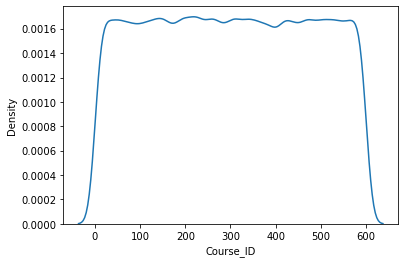

In [538]:
import seaborn as sns
sns.kdeplot(train_data['Course_ID'])

<AxesSubplot:xlabel='Competition_Metric', ylabel='Density'>

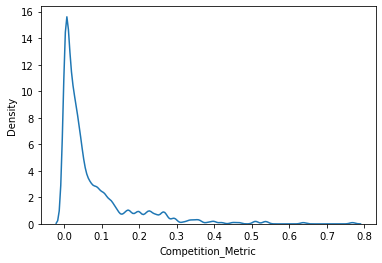

In [539]:
sns.kdeplot(train_data['Competition_Metric'])

In [540]:
##lable_encoder
from sklearn.preprocessing import LabelEncoder 
lb = LabelEncoder()

train_data['Course_Domain'] = lb.fit_transform(train_data['Course_Domain'])
train_data['Course_Type'] = lb.fit_transform(train_data['Course_Type'])

##log_scaled
train_data['Competition_Metric'] = train_data['Competition_Metric'] *1000
train_data['Competition_Metric'] = np.log(train_data['Competition_Metric'] + 0.1)

In [541]:
#categorical_vars = train_data.select_dtypes(exclude = ['int64', 'Int64', 'float64']).columns
train_data = pd.get_dummies(train_data, columns = categorical_vars)
train_data.head(10)

,Course_ID,Competition_Metric,Sales,Course_Domain_0,Course_Domain_1,Course_Domain_2,Course_Domain_3,Course_Type_0,Course_Type_1,Course_Type_2,Short_Promotion_0,Short_Promotion_1,Public_Holiday_0,Public_Holiday_1,Long_Promotion_0,Long_Promotion_1
0,1,1.960095,81,0,1,0,0,1,0,0,1,0,0,1,0,1
1,1,1.960095,79,0,1,0,0,1,0,0,1,0,1,0,0,1
2,1,1.960095,75,0,1,0,0,1,0,0,1,0,1,0,0,1
3,1,1.960095,80,0,1,0,0,1,0,0,1,0,1,0,0,1
4,1,1.960095,41,0,1,0,0,1,0,0,1,0,1,0,0,1
5,1,1.960095,62,0,1,0,0,1,0,0,1,0,1,0,0,1
6,1,1.960095,122,0,1,0,0,1,0,0,0,1,1,0,0,1
7,1,1.960095,114,0,1,0,0,1,0,0,0,1,1,0,0,1
8,1,1.960095,121,0,1,0,0,1,0,0,0,1,1,0,0,1
9,1,1.960095,100,0,1,0,0,1,0,0,0,1,1,0,0,1


In [542]:
test_data = pd.read_csv(r"C:\Users\himadri.pan\OneDrive - Fractal Analytics Pvt. Ltd\Desktop\Analytics Vidyha Hackathon\test_TyVG1cP.csv")
test_data.info()
t=test_data['ID']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  36000 non-null  int64  
 1   Day_No              36000 non-null  int64  
 2   Course_ID           36000 non-null  int64  
 3   Course_Domain       36000 non-null  object 
 4   Course_Type         36000 non-null  object 
 5   Short_Promotion     36000 non-null  int64  
 6   Public_Holiday      36000 non-null  int64  
 7   Long_Promotion      36000 non-null  int64  
 8   Competition_Metric  35880 non-null  float64
dtypes: float64(1), int64(6), object(2)
memory usage: 2.5+ MB


In [543]:
test_data.isnull().sum()

ID                      0
Day_No                  0
Course_ID               0
Course_Domain           0
Course_Type             0
Short_Promotion         0
Public_Holiday          0
Long_Promotion          0
Competition_Metric    120
dtype: int64

In [544]:
test_data['Competition_Metric']=test_data['Competition_Metric'].fillna(test_data['Competition_Metric'].median())

In [545]:
test_data.drop(['ID','Day_No'], axis = 1, inplace = True)

In [546]:
test_data.describe()

,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,Competition_Metric
count,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000
mean,300.500000,0.400000,0.010972,0.501667,0.072810
std,173.207246,0.489905,0.104174,0.500004,0.099271
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,150.750000,0.000000,0.000000,0.000000,0.010000
50%,300.500000,0.000000,0.000000,1.000000,0.034500
75%,450.250000,1.000000,0.000000,1.000000,0.092500
max,600.000000,1.000000,1.000000,1.000000,0.768000


In [547]:
test_data['Short_Promotion']=test_data['Short_Promotion'].astype('category')
test_data['Public_Holiday']=test_data['Public_Holiday'].astype('category')
test_data['Long_Promotion']=test_data['Long_Promotion'].astype('category')

In [548]:
test_data['Course_Domain'] = lb.fit_transform(test_data['Course_Domain'])
test_data['Course_Type'] = lb.fit_transform(test_data['Course_Type'])

##log_scaled
test_data['Competition_Metric'] = test_data['Competition_Metric'] *1000
test_data['Competition_Metric'] = np.log(test_data['Competition_Metric'] + 0.1)

In [549]:
#categorical_vars1 = test_data.select_dtypes(exclude = ['int64', 'Int64', 'float64']).columns
test_data = pd.get_dummies(test_data, columns = categorical_vars1)
test_data.head(10)

,Course_ID,Competition_Metric,Course_Domain_0,Course_Domain_1,Course_Domain_2,Course_Domain_3,Course_Type_0,Course_Type_1,Course_Type_2,Short_Promotion_0,Short_Promotion_1,Public_Holiday_0,Public_Holiday_1,Long_Promotion_0,Long_Promotion_1
0,1,1.960095,0,1,0,0,1,0,0,0,1,1,0,0,1
1,1,1.960095,0,1,0,0,1,0,0,0,1,1,0,0,1
2,1,1.960095,0,1,0,0,1,0,0,0,1,1,0,0,1
3,1,1.960095,0,1,0,0,1,0,0,0,1,1,0,0,1
4,1,1.960095,0,1,0,0,1,0,0,1,0,1,0,0,1
5,1,1.960095,0,1,0,0,1,0,0,1,0,1,0,0,1
6,1,1.960095,0,1,0,0,1,0,0,1,0,1,0,0,1
7,1,1.960095,0,1,0,0,1,0,0,1,0,1,0,0,1
8,1,1.960095,0,1,0,0,1,0,0,1,0,1,0,0,1
9,1,1.960095,0,1,0,0,1,0,0,1,0,1,0,0,1


In [550]:
#train_data_x = train_data[['Course_ID','Course_Domain','Course_Type','Short_Promotion','Public_Holiday','Long_Promotion',
                         # 'Competition_Metric','User_Traffic']]

In [551]:
#train_data_x

In [552]:
#train_data_x1 = train_data_x.drop(['User_Traffic'], axis = 1)
#train_data_y1 = train_data_x['User_Traffic']

In [553]:
#from sklearn.metrics import mean_squared_log_error as mslr
#from sklearn.linear_model import LinearRegression as LR
#linear_model = LR()


#linear_model .fit(train_data_x1,train_data_y1)
#train_data_yhat = linear_model.predict(train_data_x1)


#train_data_yhat = np.where(train_data_yhat < 0, 1, train_data_yhat)
#train_scoreVal = mslr(train_data_y1,train_data_yhat)

In [554]:
#test_user_traffic = linear_model.predict(test_data)

In [555]:
#test_data['User_Traffic']=test_user_traffic

In [556]:
#test_data

In [557]:
train_data_x2 = train_data.drop(['Sales'], axis = 1)
train_data_y2 = train_data['Sales']

In [558]:
#yb=train_data_x2['User_Traffic']
#train_data_x2.drop(['User_Traffic'], axis = 1, inplace=True)
#train_data_x2['User_Traffic']=yb

In [559]:
from sklearn.metrics import mean_squared_log_error as mslr
from sklearn.linear_model import LinearRegression as LR
linear_model = LR()


linear_model .fit(train_data_x2,train_data_y2)
train_data_yhat = linear_model.predict(train_data_x2)


train_data_yhat = np.where(train_data_yhat < 0, 1, train_data_yhat)
train_scoreVal = mslr(train_data_y2,train_data_yhat)

In [560]:
test_sales = linear_model.predict(test_data)

#test_sales_submit = pd.DataFrame(t)
#test_sales_submit['Sales'] = test_sales

#test_sales_submit.set_index('ID', inplace = True)

#test_sales_submit.to_csv('Final_submit2.csv')

In [561]:
test_sales

array([135.74553186, 135.74553186, 135.74553186, ..., 146.35779948,
       146.35779948, 146.35779948])

In [562]:
from sklearn.tree import DecisionTreeRegressor
dtreg = DecisionTreeRegressor(random_state=0)
dtreg.fit(train_data_x2,train_data_y2)

DecisionTreeRegressor(random_state=0)

In [563]:
test_sales1=dtreg.predict(test_data)

In [564]:
#pd.DataFrame(test_sales1).to_csv('Submission2.csv',index=False)

In [565]:
test_sales1

array([113.14589666, 113.14589666, 113.14589666, ..., 129.35779817,
       129.35779817, 129.35779817])